In [ ]:
#importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#selected companies
companies = {
    'Eli Lilly': 'LLY',
    'Johnson & Johnson': 'JNJ',
    'AbbVie': 'ABBV'
}

#Downloading Data

In [ ]:
#10 years time frame for analysis
start_date = '2015-01-01'
end_date = '2024-11-30'

In [ ]:
#download historical data
def get_stock_data(tickers, start_date, end_date):
    stock_data = {}
    for company, ticker in tickers.items():
        stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [ ]:
stock_data = get_stock_data(companies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

{'Eli Lilly': Price        Adj Close       Close        High         Low        Open  \
 Ticker             LLY         LLY         LLY         LLY         LLY   
 Date                                                                     
 2015-01-02   58.001339   70.059998   70.820000   69.720001   69.769997   
 2015-01-05   57.430099   69.370003   70.089996   69.150002   69.730003   
 2015-01-06   57.719887   69.720001   70.910004   69.199997   69.919998   
 2015-01-07   57.314209   69.230003   70.529999   68.449997   70.029999   
 2015-01-08   58.671936   70.870003   71.489998   69.660004   70.000000   
 ...                ...         ...         ...         ...         ...   
 2024-11-22  748.010010  748.010010  761.280029  745.080017  757.049988   
 2024-11-25  755.000000  755.000000  755.000000  740.010010  750.000000   
 2024-11-26  789.320007  789.320007  807.000000  773.950012  785.200012   
 2024-11-27  788.190002  788.190002  794.830017  780.299988  788.119995   
 2024-11-29 

The Health Care Select Sector SPDR Fund (XLV) is an exchange-traded fund (ETF) that seeks to track the performance of the Health Care Select Sector Index, which includes companies in the healthcare sector of the U.S. stock market. The fund is part of the Select Sector SPDRs, a family of ETFs that represent various sectors of the S&P 500 index.

XLV reflects how the healthcare sector is performing in the stock market. If the healthcare industry is doing well, XLV will likely show positive returns, and if the sector faces challenges, the fund may underperform

In [ ]:
#XLV as the healthcare sector benchmark
sector_etf = 'XLV'

In [ ]:
# Fetch XLV data for sector analysis
sector_data = yf.download(sector_etf, start_date, end_date)
sector_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,XLV,XLV,XLV,XLV,XLV,XLV
Date,,,,,,
2015-01-02,58.300133,68.629997,69.349998,68.349998,68.709999,7516800
2015-01-05,58.002804,68.279999,68.879997,68.150002,68.320000,10784800
2015-01-06,57.807407,68.050003,69.089996,67.629997,68.510002,13344500
2015-01-07,59.166599,69.650002,69.669998,68.360001,68.510002,14146400
2015-01-08,60.177464,70.839996,70.919998,70.220001,70.339996,22138400
...,...,...,...,...,...,...
2024-11-22,143.510239,144.160004,145.020004,143.940002,144.330002,6330300
2024-11-25,144.734695,145.389999,145.850006,144.789993,144.809998,6834300


In [ ]:
# Fetch market index data for beta calculation (e.g., S&P 500)
market_data = yf.download('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
market_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2015-01-02,2058.199951,2058.199951,2072.360107,2046.040039,2058.899902,2708700000
2015-01-05,2020.579956,2020.579956,2054.439941,2017.339966,2054.439941,3799120000
2015-01-06,2002.609985,2002.609985,2030.250000,1992.439941,2022.150024,4460110000
2015-01-07,2025.900024,2025.900024,2029.609985,2005.550049,2005.550049,3805480000
2015-01-08,2062.139893,2062.139893,2064.080078,2030.609985,2030.609985,3934010000
...,...,...,...,...,...,...
2024-11-22,5969.339844,5969.339844,5972.899902,5944.359863,5944.359863,4141420000
2024-11-25,5987.370117,5987.370117,6020.750000,5963.910156,5992.279785,5633150000


#Calculating Financial Risks

**Volatility** refers to the degree of price fluctuation in a stock or market over a specific period. A stock with high volatility experiences large price swings, while a stock with low volatility moves in smaller increments.

In [ ]:
# Calculate Volatility
def calculate_volatility(data):
    daily_returns = data['Close'].pct_change().dropna()
    if daily_returns.empty:
        return None  # Handle empty data
    return float(daily_returns.std() * (252 ** 0.5))  # Annualized Volatility

**Beta** is a measure of a stock's sensitivity to the broader market movements, or its systematic risk. It shows how much a stock's price tends to move in relation to the overall market, typically measured against the S&P 500.
*   A stock with a beta of 1 moves in line with the market
*   A stock with a beta greater than 1 is more volatile than the market
*   A stock with a beta less than 1 is less volatile than the market


In [ ]:
#Calculate Beta
def calculate_beta(data, market_data):
    # Merge stock and market returns
    merged = pd.concat([data['Close'].pct_change(), market_data['Close'].pct_change()], axis=1, keys=['Stock', 'Market']).dropna()
    if merged.empty:
        return None  # Handle empty data
    # Calculate covariance and variance
    covariance = merged.cov().iloc[0, 1]
    market_variance = merged['Market'].var()
    return float(covariance / market_variance)

**Average Trading Volume** helps assess the liquidity risk of a stock. Higher trading volumes usually mean that the stock is more liquid, which makes it easier to enter or exit a position without significantly affecting the stock price.

In [ ]:
#Calculate Average Trading Volume (Liquidity Risk)
def calculate_average_volume(data):
    if data.empty or 'Volume' not in data:
        return None  # Handle empty data
    return float(data['Volume'].mean())

**VaR** is a statistical measure used to assess the potential loss in value of an asset or portfolio over a given time period, under normal market conditions, and for a specific confidence level (in this case, 95%).
The 95% confidence level means that there is a 95% probability that the loss will not exceed the VaR value over the time period

In [ ]:
#Calculate Value at Risk (VaR)
def calculate_var(data, confidence_level=0.95):
    daily_returns = data['Close'].pct_change().dropna()
    if daily_returns.empty:
        return None  # Handle empty data
    var = np.percentile(daily_returns, (1 - confidence_level) * 100)
    return float(var * data['Close'].iloc[-1])  # Scaling to the current portfolio value

In [ ]:
# Analyze yearly and quarterly performance trends
def performance_trends(data):
    if data.empty:
        return None, None  # Handle empty data
    data['Year'] = data.index.year
    data['Quarter'] = data.index.quarter
    yearly_performance = data.groupby('Year')['Close'].mean()
    quarterly_performance = data.groupby(['Year', 'Quarter'])['Close'].mean()
    return yearly_performance, quarterly_performance


#Visualization

<ipython-input-14-ba31ae2b624d>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(daily_returns.std() * (252 ** 0.5))  # Annualized Volatility
<ipython-input-14-ba31ae2b624d>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(daily_returns.std() * (252 ** 0.5))  # Annualized Volatility
<ipython-input-14-ba31ae2b624d>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(daily_returns.std() * (252 ** 0.5))  # Annualized Volatility
<ipython-input-14-ba31ae2b624d>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(daily_returns.std() * (252 ** 0.5))  # Annual

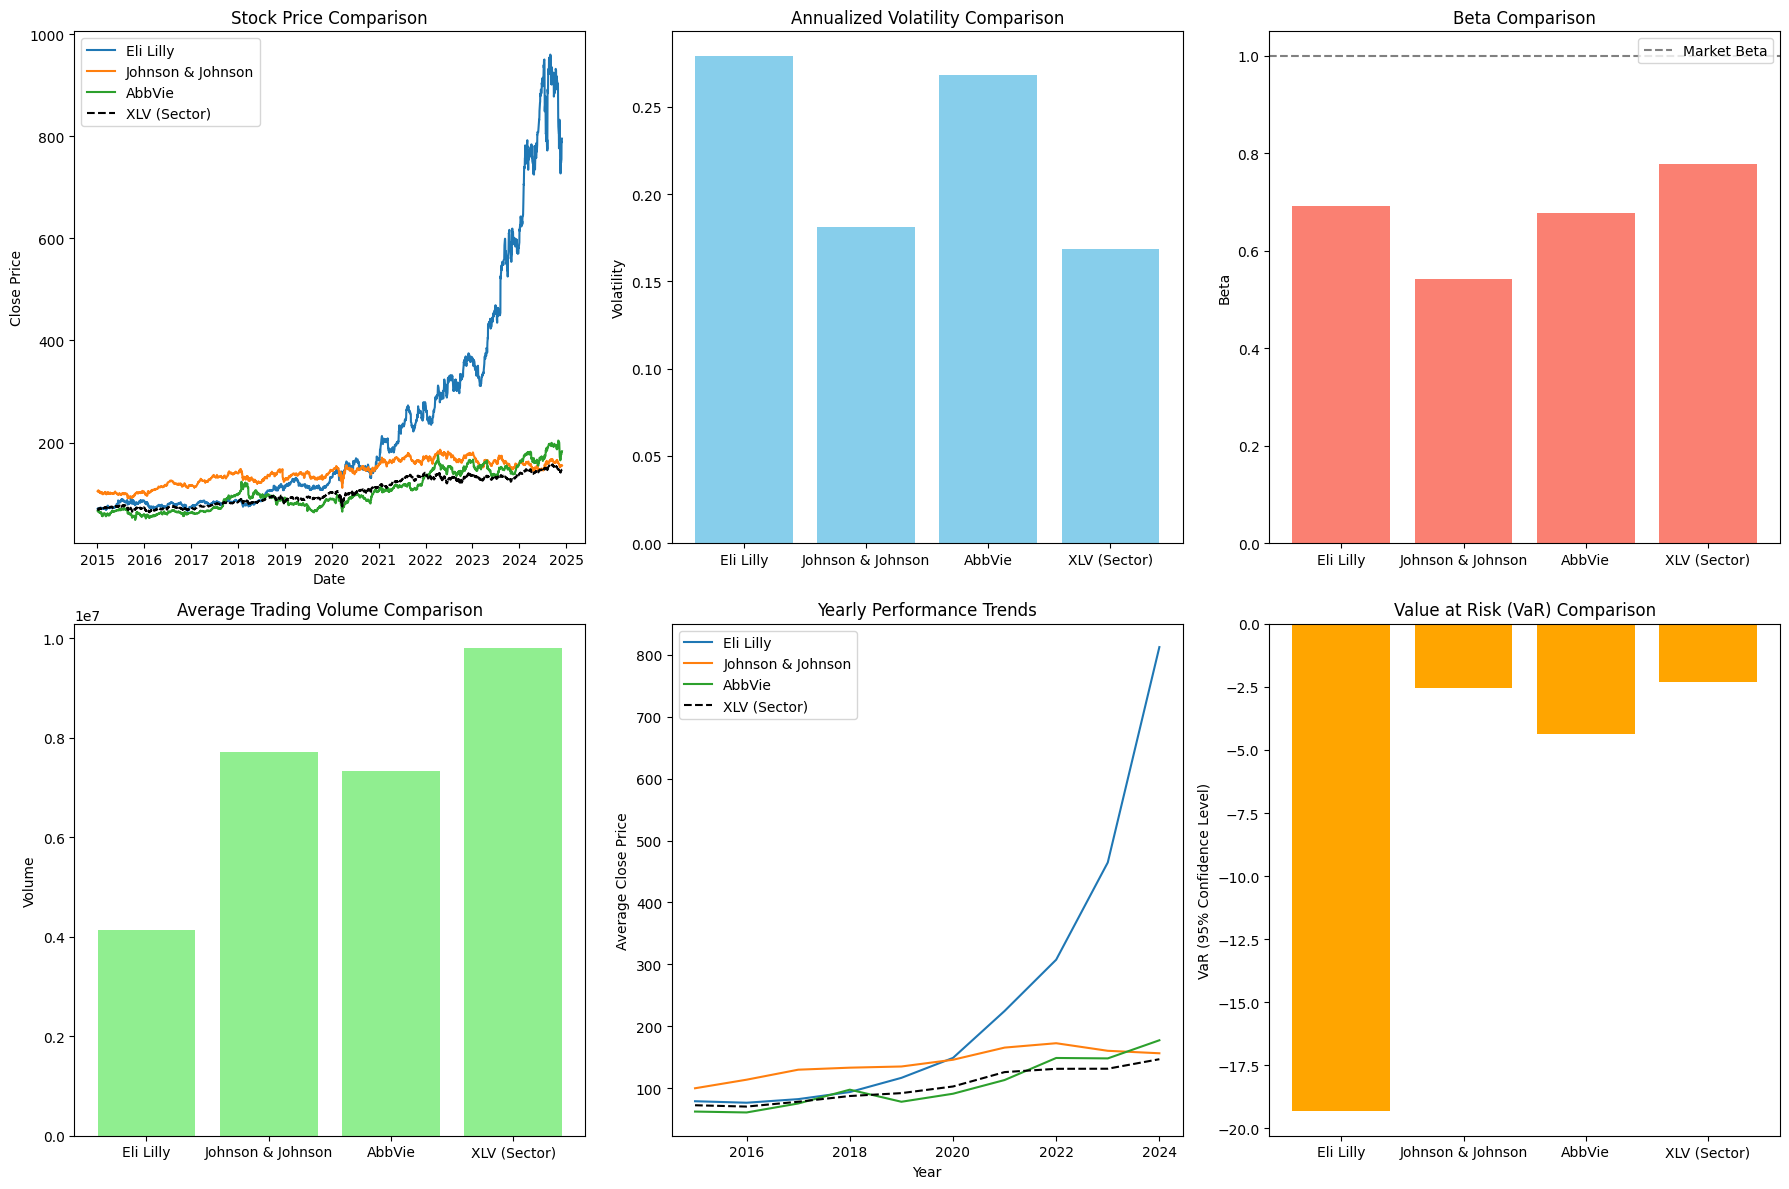

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot stock performance trends
for company, data in stock_data.items():
    if not data.empty:
        axes[0].plot(data['Close'], label=company)
if not sector_data.empty:
    axes[0].plot(sector_data['Close'], label='XLV (Sector)', linestyle='--', color='black')
axes[0].set_title('Stock Price Comparison')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')
axes[0].legend()

# Plot volatility comparison
volatilities = {company: calculate_volatility(data) for company, data in stock_data.items() if calculate_volatility(data) is not None}
if calculate_volatility(sector_data) is not None:
    volatilities['XLV (Sector)'] = calculate_volatility(sector_data)
axes[1].bar(volatilities.keys(), [float(v) for v in volatilities.values()], color='skyblue')
axes[1].set_title('Annualized Volatility Comparison')
axes[1].set_ylabel('Volatility')

# Plot beta comparison
betas = {company: calculate_beta(data, market_data) for company, data in stock_data.items() if calculate_beta(data, market_data) is not None}
if calculate_beta(sector_data, market_data) is not None:
    betas['XLV (Sector)'] = calculate_beta(sector_data, market_data)
axes[2].bar(betas.keys(), [float(b) for b in betas.values()], color='salmon')
axes[2].set_title('Beta Comparison')
axes[2].set_ylabel('Beta')
axes[2].axhline(1.0, color='gray', linestyle='--', label='Market Beta')
axes[2].legend()

# Plot average trading volume comparison
volumes = {company: calculate_average_volume(data) for company, data in stock_data.items() if calculate_average_volume(data) is not None}
if calculate_average_volume(sector_data) is not None:
    volumes['XLV (Sector)'] = calculate_average_volume(sector_data)
axes[3].bar(volumes.keys(), [float(v) for v in volumes.values()], color='lightgreen')
axes[3].set_title('Average Trading Volume Comparison')
axes[3].set_ylabel('Volume')

# Plot yearly performance trends
for company, data in stock_data.items():
    if not data.empty:
        yearly_perf, _ = performance_trends(data)
        if yearly_perf is not None:
            axes[4].plot(yearly_perf.index, yearly_perf.values, label=company)
if not sector_data.empty:
    yearly_perf_sector, _ = performance_trends(sector_data)
    if yearly_perf_sector is not None:
        axes[4].plot(yearly_perf_sector.index, yearly_perf_sector.values, label='XLV (Sector)', linestyle='--', color='black')
axes[4].set_title('Yearly Performance Trends')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Average Close Price')
axes[4].legend()

# Plot VaR comparison
vars = {company: calculate_var(data) for company, data in stock_data.items() if calculate_var(data) is not None}
if calculate_var(sector_data) is not None:
    vars['XLV (Sector)'] = calculate_var(sector_data)
axes[5].bar(vars.keys(), [float(v) for v in vars.values()], color='orange')
axes[5].set_title('Value at Risk (VaR) Comparison')
axes[5].set_ylabel('VaR (95% Confidence Level)')

plt.tight_layout()
plt.show()



**Interpretation:**

Eli Lilly's stock price has significantly outperformed both Johnson & Johnson and AbbVie over the period shown.


Higher volatility for Eli Lilly and AbbVie suggests greater risks but also the potential for higher returns.
Johnson & Johnson, with relatively lower volatility, represents a more stable investment choice within the sector.

The beta values suggest that these individual stocks (Eli Lilly, Johnson & Johnson, AbbVie) are less reactive to overall market changes, which could make them attractive for diversification.

Eli Lilly stands out as a high-growth, high-risk investment with significant potential upside and downside.
Johnson & Johnson and AbbVie represent more stable investment options, with moderate risks and returns


#Seasonal Analysis

In [ ]:
def calculate_seasonal_performance(data):

    if data.empty:
        return None, None

    data['Month'] = data.index.month
    data['Quarter'] = data.index.quarter

    monthly_returns = data['Close'].pct_change().groupby(data['Month']).mean() * 100  # Convert to percentage

    quarterly_returns = data['Close'].pct_change().groupby(data['Quarter']).mean() * 100  # Convert to percentage

    return monthly_returns, quarterly_returns


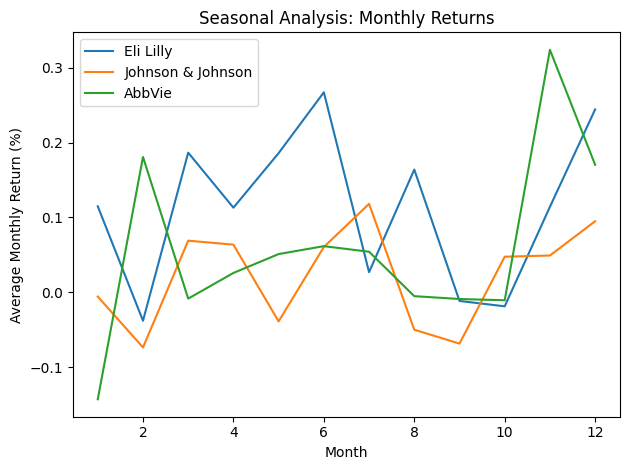

In [ ]:
#Plot Seasonal Analysis
for company, data in stock_data.items():
      if not data.empty:
            monthly_returns, _ = calculate_seasonal_performance(data)
            if monthly_returns is not None:
                plt.plot(monthly_returns.index, monthly_returns.values, label=company)

plt.title('Seasonal Analysis: Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Monthly Return (%)')
plt.legend()

plt.tight_layout()
plt.show()


Interpretation:

We can see that there is no particular seasonal pattern followed however Eli Lilly and Abbvie average monthly returns increases in the month of October

#Sector Analysis

In [ ]:
def sector_performance(stock_data, sector_data, market_data):
    # Calculate key metrics for XLV
    sector_volatility = calculate_volatility(sector_data)
    sector_beta = calculate_beta(sector_data, market_data)
    sector_var = calculate_var(sector_data)
    # Calculate yearly performance for XLV
    yearly_perf_sector, quarterly_perf_sector = performance_trends(sector_data)
    # Display XLV's performance
    print("### Sector (XLV) Performance Analysis ###")
    print(f"Sector Volatility (Annualized): {sector_volatility:.2f}")
    print(f"Sector Beta (Relative to Market): {sector_beta:.2f}")
    print(f"Sector Value at Risk (VaR - 95%): {sector_var:.2f}")
    print("Yearly Performance for XLV (Sector):")
    if yearly_perf_sector is not None:
        print(yearly_perf_sector)
    print("Quarterly Performance for XLV (Sector):")
    if quarterly_perf_sector is not None:
        print(quarterly_perf_sector)
    print("Sector Volatility", sector_volatility)
    print("Sector Beta", sector_beta)
    print("Sector VaR", sector_var)


In [ ]:
sector_performance(stock_data, sector_data, market_data)

NameError: name 'stock_data' is not defined

The sector's volatility is relatively low at 16.82%, indicating that price fluctuations in the healthcare sector are not overly extreme compared to individual stocks

 The sector beta is 0.78, which is below 1.

 The sector's VaR at a 95% confidence level is -2.31%.

#Investment Recommendation

In [ ]:
def investment_recommendation(stock_data, market_data, sector_data):
    recommendations = {}
    for company, data in stock_data.items():
        volatility = calculate_volatility(data)
        beta = calculate_beta(data, market_data)
        avg_volume = calculate_average_volume(data)
        var = calculate_var(data)

        if volatility < 0.2 and beta < 1.0 and avg_volume > 1000000 and var > -0.05:
            recommendations[company] = 'Buy'
        else:
            recommendations[company] = 'Sell'

    return recommendations

In [ ]:
# Calculate and display recommendations
recommendations = investment_recommendation(stock_data, market_data, sector_data)
print("Investment Recommendations:", recommendations, "\n\n\n")

Investment Recommendations: {'Eli Lilly': 'Sell', 'Johnson & Johnson': 'Sell', 'AbbVie': 'Sell'} 





<ipython-input-14-ba31ae2b624d>:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(daily_returns.std() * (252 ** 0.5))  # Annualized Volatility
<ipython-input-15-8f6b74b77fbb>:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(covariance / market_variance)
<ipython-input-16-568c93ecf78b>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(data['Volume'].mean())
<ipython-input-17-d648de93cbff>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(var * data['Close'].iloc[-1])  # Scaling to the current portfolio value
<ipython-input-14-ba31ae2b624d>:6: Future

#Conclusion

The sector is expected to lose no more than 2.31% of its value on a given day with 95% confidence. The relatively low VaR highlights the sector's lower downside risk, further supporting its appeal for conservative investors.

The healthcare sector tends to show stable performance, reflecting its defensive nature, as it is less affected by economic cycles. This makes the sector appealing to risk-averse investors looking for steady returns.

Eli Lilly stands out as a high-growth, high-risk investment with significant potential upside and downside.
Johnson & Johnson and AbbVie represent more stable investment options, with moderate risks and returns.

Investment Recommendation is **Sell** for all three companies





